# Computational Statistics - TP1

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Exercise 2

**Question 4)**


---
**a)**

We want to compute $\it{P}^n(x, \frac{1}{m + n})$ for $n \in \mathbb{N}^*$ having $x = \frac{1}{m}$

$n = 1$, we have $$ \it{P}(x, \frac{1}{m + 1}) = (1- {(\frac{1}{m}})^2) $$

$n = 2$, we have $$ \it{P}^2(x, \frac{1}{m + 2}) ={P}(x, \frac{1}{m + 1}) \times {P}(\frac{1}{m + 1}, \frac{1}{m+2}) = (1- {(\frac
{1}{m}})^2) \times (1- {(\frac{1}{m +1}})^2) $$


<br>

Thus, let's show that $ \forall n \in \mathbb{N}^*, \it{P}^n(x, \frac{1}{m + n}) = \prod_{k = 0}^{n-1} (1- {(\frac{1}{m +k}})^2)$


Suppose that: $ \exists n \in \mathbb{N}^*$ such that $\it{P}^n(x, \frac{1}{m + n})  = \prod_{k = 0}^{n-1} (1- {(\frac{1}{m +k}})^2)$

<br>

Then,

$$\begin{align*}
\it{P}^{n+1}(x, \frac{1}{m + n + 1 }) &= \it{P}^n(x, \frac{1}{m + n}){P}(\frac{1}{m + n}, \frac{1}{m+n+1}) \\
&= \prod_{k = 0}^{n-1} (1- {(\frac{1}{m +k}})^2)
\end{align*}$$

(This is interpretable as the fact that he only way to go from $\frac{1}{m}$ to $\frac{1}{m+ n +1}$ at state $n$ is to visit consecutively the $\frac{1}{m+k}$, $1 \leq k  \leq n$)


---

**b)**


First: $\pi(A) = \pi(\cup_{q \in \mathbb{N}}(\frac{1}{m+1+q})) = \sum_{q \in \mathbb{N}} \pi(\frac{1}{m + q + 1 })= 0$  ($\pi$ is the uniform distribution on $[0,1]$, from question 2 ).

Let's show that $ \lim_{n\to\infty} \it{P}^{n}(x, A) \neq 0$.

Let $n \in \mathbb{N}$, 
$$\it{P}^{n}(x, A) =  \sum_{q \in \mathbb{N}} \it{P}^n(x, \frac{1}{m + q + 1 }) =  \it{P}^n(x, \frac{1}{m + n}) $$

(from $\frac{1}{m}$, we can only access the discrete state $\frac{1}{m+n}$ after n steps )

And 

$$\it{P}^n(x, \frac{1}{m + n}) = \prod_{k = 0}^{n-1} (1- {(\frac{1}{m +k}})^2)$$
$m \geq 2$, thus:

$$\begin{align*}
	\it{P}^n(x, \frac{1}{m + n})	&\geq \prod_{k = 0}^{n-1} (1- {(\frac{1}{k + 2}})^2) \\     
								&\geq \prod_{k = 2}^{n+1} (1- {(\frac{1}{k}})^2) \\
								&\geq \prod_{k = 2}^{n+1} \frac{(k-1)(k+1)}{k^2} \\
								&\geq \frac{n+2}{(n+1)^2} \\
\end{align*}
$$


Thus, the limit holds: 
$$\it{P}^n(x, \frac{1}{m + n}) \geq \frac{1}{2} > 0$$

In conclusion, we have: $$\lim_{n\to\infty} \it{P}^{n}(x, A) \neq \pi(A)$$
 

# Exercise 3

## Question 1.


We want to compute $$R(w) = \mathbb{E}[J(w, z)]$$

With: $$J(w,z) = (y - ^twx)^2$$

The gradient wrt to $w$ is: $$\nabla_w J(w, z) = -2(y-^twx)x$$


Thus, the stochastic gradient descent is as follow:

At each step, 
* sample a random $z_{k+1}$
* compute $w_{k+1} = w_k - \epsilon_{k} \nabla_w J(w_k, z_{k+1}) $


And we chose an appropriate suite of steps $(\epsilon_k)_k$ such that $\sum \epsilon_k = +\infty$ and $\sum \epsilon_k^2 < +\infty$ ($\epsilon_k = \frac{1}{k}$ below)

In [62]:
def stochastic_gradient_descent(Z, N):
    """
    Executes gradient descent algorithm on Z, for N steps.
    No explicit convergence limit is set
    """
    # Extract data and sizes
    X = Z[0]
    Y = Z[1]
    M = Z[0].shape[1]
    # Random initialization of omega
    omega = np.ones(M)/np.sqrt(M)

    for k in range(1, N+1):
        # Set the step epsilon
        epsilon = 1/k
        # Take random z in the Z
        i_rand = np.random.randint(X.shape[0]) 
        x,y = X[i_rand],Y[i_rand]
        # Compute gradient
        grad = -2*(y-np.dot(omega,x))*x
        # Compute new omega vector
        omega = omega - epsilon*grad
        # Normalize
        omega = omega/np.linalg.norm(omega)
            
    return omega

Let' make a prediction function for later questions (question 5)

In [63]:
def predict(X, omega):
    return np.array([np.sign(np.dot(x, omega)) for x in X])

## Question 2.

In [64]:
def generate_samples(N, omega):
    """
    Generates N samples in a square uniformaly and a label in {-1, 1} depending 
    on the side of the hyperplane the point lies in.
    """
    X = np.array([[np.random.random() - 0.5, np.random.random() - 0.5] for i in range(N)])
    Y = predict(X, omega)

    return [X, Y]

In [65]:
# Generate random hyperplane normal vector
angle = 2*np.pi*np.random.random()
omega_bar = np.array([np.cos(angle), np.sin(angle)])

# Generate samples
N_samples = 250
Z = generate_samples(N_samples, omega_bar)

In [74]:
# Useful plotting functions

def plot_hyperplane(normal_vector, color_str='blue', label=None):
    plt.plot([-0.5*normal_vector[1], 0.5*normal_vector[1]], 
			[0.5*normal_vector[0], -0.5*normal_vector[0]], 
			linewidth=2, color=color_str, label=label)

def plot_samples(Z, color=['orange', 'purple']):
    X = Z[0]
    Y = Z[1]
    plt.scatter(X[:, 0], X[:, 1], c=[color[int((y+1)/2)] for y in Y], s=4)


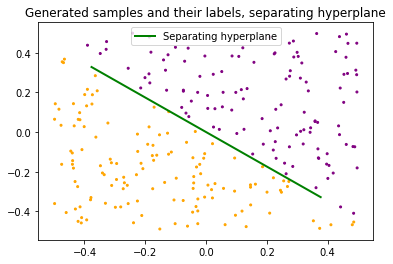

In [67]:
# Plot the generated samples
plot_samples(Z)
# Plot a line to represent the hyperplane
plot_hyperplane(omega_bar, 'green', label = 'Separating hyperplane')

plt.title("Generated samples and their labels, separating hyperplane")
plt.legend()

## Question 3

In [68]:
# Apply stochastic gradient descent
omega_star = stochastic_gradient_descent(Z, 3000)

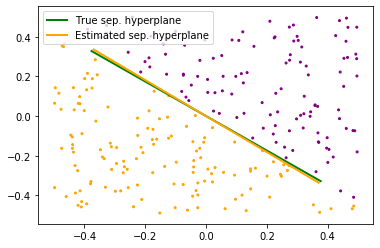

In [75]:
plot_samples(Z)
plot_hyperplane(omega_bar, 'green', label = 'True sep. hyperplane')
plot_hyperplane(omega_star, 'orange', label = 'Estimated sep. hyperplane')
plt.legend()

We can see that the $w^*$ is very close to $w$ compared to the cale of the data. We have good results with the SGD.

## Question 4

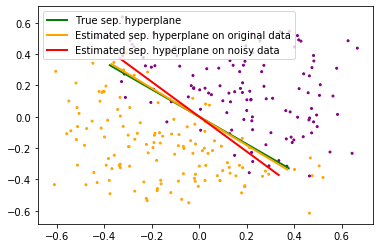

In [70]:
# Add noise of standard deviation sigma
sigma = 0.1
Z_noisy = Z.copy()
Z_noisy[0] = Z_noisy[0] + np.random.normal(0,sigma,2*N_samples).reshape((N_samples,2))

# Recompute the stochastic gradient descent on the noisy data
omega_star_noisy = stochastic_gradient_descent(Z_noisy, 300)

# Plot
plot_samples(Z_noisy)
plot_hyperplane(omega_bar, 'green', label = 'True sep. hyperplane')
plot_hyperplane(omega_star, 'orange', label = 'Estimated sep. hyperplane on original data')
plot_hyperplane(omega_star_noisy, 'red', label = 'Estimated sep. hyperplane on noisy data')
plt.legend()

Because of the noise, the algorithm has more difficulty finding the right hyperplane, for a $\sigma = 0.1$, the misclasification errors remain rare.

## Question 5

In [71]:
#Import data, drop rows with missing features, convert to float
data_pd = pd.read_csv("breast-cancer-wisconsin.data",sep = ',', header=None).replace('?', None).dropna().astype(np.float64)
# Display data
data_pd.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


In [72]:
# Format data, labels to {-1, 1}
X = data_pd.iloc[:,1:10].to_numpy()
Y = data_pd.iloc[:,10].to_numpy().astype(int) - 3

# Scale data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.6, shuffle = True)

In [73]:
# Run SGD
omega_breastcancer = stochastic_gradient_descent((X_train,Y_train), 30000)
# Compute misclasification error 
print("Misclassified cases ratio:",abs((predict(X_test, omega_breastcancer) - Y_test)/2).sum()/Y_test.shape[0])

Misclassified cases ratio: 0.06428571428571428


The algorithm performed pretty well here, with a total misclasification error of around 6%.